In [54]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

# Classification Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier

from sklearn.metrics import plot_confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

# Scalers
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Categorical Create Dummies
from sklearn.preprocessing import OneHotEncoder

- amount_tsh - Total static head (amount water available to waterpoint)
- date_recorded - The date the row was entered
- funder - Who funded the well
- gps_height - Altitude of the well
- installer - Organization that installed the well
- longitude - GPS coordinate
- latitude - GPS coordinate
- wpt_name - Name of the waterpoint if there is one
- num_private -
- basin - Geographic water basin
- subvillage - Geographic location
- region - Geographic location
- region_code - Geographic location (coded)
- district_code - Geographic location (coded)
- lga - Geographic location
- ward - Geographic location
- population - Population around the well
- public_meeting - True/False
- recorded_by - Group entering this row of data
- scheme_management - Who operates the waterpoint
- scheme_name - Who operates the waterpoint
- permit - If the waterpoint is permitted
- construction_year - Year the waterpoint was constructed
- extraction_type - The kind of extraction the waterpoint uses
- extraction_type_group - The kind of extraction the waterpoint uses
- extraction_type_class - The kind of extraction the waterpoint uses
- management - How the waterpoint is managed
- management_group - How the waterpoint is managed
- payment - What the water costs
- payment_type - What the water costs
- water_quality - The quality of the water
- quality_group - The quality of the water
- quantity - The quantity of water
- quantity_group - The quantity of water
- source - The source of the water
- source_type - The source of the water
- source_class - The source of the water
- waterpoint_type - The kind of waterpoint
- waterpoint_type_group - The kind of waterpoint

In [151]:
# df = pd.read_csv('data/water_wells_values.csv')

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [59]:
df['date_recorded'].value_counts().sort_index()

2002-10-14      1
2004-01-07      1
2004-03-01      4
2004-03-06      1
2004-04-01      1
             ... 
2013-11-02     24
2013-11-03    194
2013-12-01      1
2013-12-02     33
2013-12-03    240
Name: date_recorded, Length: 356, dtype: int64

In [60]:
df['amount_tsh'].value_counts().sort_index()

0.00         41639
0.20             3
0.25             1
1.00             3
2.00            13
             ...  
138000.00        1
170000.00        1
200000.00        1
250000.00        1
350000.00        1
Name: amount_tsh, Length: 98, dtype: int64

In [70]:
df['funder'].value_counts().sort_values()

Wafidhi Wa Ziwa T               1
Hearts Helping Hands.Inc.       1
Ndorobo Tours                   1
W.F.D.P                         1
Mnyama                          1
                             ... 
World Bank                   1349
Rwssp                        1374
Hesawa                       2202
Danida                       3114
Government Of Tanzania       9084
Name: funder, Length: 1897, dtype: int64

In [66]:
df['installer'].value_counts().sort_values(ascending=False)

DWE                     17402
Government               1825
RWE                      1206
Commu                    1060
DANIDA                   1050
                        ...  
Moshono ADP                 1
Villi                       1
Engarasero villagers        1
CONCE                       1
SAFARI CAMP                 1
Name: installer, Length: 2145, dtype: int64

In [71]:
df['wpt_name'].value_counts().sort_values(ascending=False)

none                      3563
Shuleni                   1748
Zahanati                   830
Msikitini                  535
Kanisani                   323
                          ... 
Kwa Aroun                    1
Buchambi                     1
Kwa Shedrak                  1
Kwabutu Shule Ya Msing       1
Kwamaige                     1
Name: wpt_name, Length: 37400, dtype: int64

In [83]:
df['num_private'].value_counts().sort_values(ascending=False)

0      58643
6         81
1         73
5         46
8         46
       ...  
60         1
698        1
30         1
160        1
94         1
Name: num_private, Length: 65, dtype: int64

In [76]:
df['basin'].value_counts().sort_values(ascending=False)

Lake Victoria              10248
Pangani                     8940
Rufiji                      7976
Internal                    7785
Lake Tanganyika             6432
Wami / Ruvu                 5987
Lake Nyasa                  5085
Ruvuma / Southern Coast     4493
Lake Rukwa                  2454
Name: basin, dtype: int64

In [85]:
df['population'].value_counts().sort_index()

0        21381
1         7025
2            4
3            4
4           13
         ...  
9865         1
10000        3
11463        1
15300        1
30500        1
Name: population, Length: 1049, dtype: int64

In [126]:
df['region'].value_counts().sort_values(ascending=False)

Iringa           5294
Shinyanga        4982
Mbeya            4639
Kilimanjaro      4379
Morogoro         4006
Arusha           3350
Kagera           3316
Mwanza           3102
Kigoma           2816
Ruvuma           2640
Pwani            2635
Tanga            2547
Dodoma           2201
Singida          2093
Mara             1969
Tabora           1959
Rukwa            1808
Mtwara           1730
Manyara          1583
Lindi            1546
Dar es Salaam     805
Name: region, dtype: int64

In [5]:
df.describe()

id     amount_tsh    gps_height     longitude      latitude  \
count  59400.000000   59400.000000  59400.000000  59400.000000  5.940000e+04   
mean   37115.131768     317.650385    668.297239     34.077427 -5.706033e+00   
std    21453.128371    2997.574558    693.116350      6.567432  2.946019e+00   
min        0.000000       0.000000    -90.000000      0.000000 -1.164944e+01   
25%    18519.750000       0.000000      0.000000     33.090347 -8.540621e+00   
50%    37061.500000       0.000000    369.000000     34.908743 -5.021597e+00   
75%    55656.500000      20.000000   1319.250000     37.178387 -3.326156e+00   
max    74247.000000  350000.000000   2770.000000     40.345193 -2.000000e-08   

        num_private   region_code  district_code    population  \
count  59400.000000  59400.000000   59400.000000  59400.000000   
mean       0.474141     15.297003       5.629747    179.909983   
std       12.236230     17.587406       9.633649    471.482176   
min        0.000000      1.000000       0.000000      0.000000   
25%        0.000000      5.000000       2.000000      0.000000   
50%        0.000000     12.000000       3.000000     25.000000   
75%        0.000000     17.000000       5.000000    215.000000   
max     1776.000000     99.000000      80.000000  30500.000000   

       construction_year  
count       59400.000000  
mean         1300.652475  
std           951.620547  
min             0.000000  
25%             0.000000  
50%          1986.000000  
75%          2004.000000  
max          2013.000000

In [14]:
df['construction_year'].value_counts().sort_index()

0       20709
1960      102
1961       21
1962       30
1963       85
1964       40
1965       19
1966       17
1967       88
1968       77
1969       59
1970      411
1971      145
1972      708
1973      184
1974      676
1975      437
1976      414
1977      202
1978     1037
1979      192
1980      811
1981      238
1982      744
1983      488
1984      779
1985      945
1986      434
1987      302
1988      521
1989      316
1990      954
1991      324
1992      640
1993      608
1994      738
1995     1014
1996      811
1997      644
1998      966
1999      979
2000     2091
2001      540
2002     1075
2003     1286
2004     1123
2005     1011
2006     1471
2007     1587
2008     2613
2009     2533
2010     2645
2011     1256
2012     1084
2013      176
Name: construction_year, dtype: int64

In [11]:
df.head()

id  amount_tsh date_recorded        funder  gps_height     installer  \
0  69572      6000.0    2011-03-14         Roman        1390         Roman   
1   8776         0.0    2013-03-06       Grumeti        1399       GRUMETI   
2  34310        25.0    2013-02-25  Lottery Club         686  World vision   
3  67743         0.0    2013-01-28        Unicef         263        UNICEF   
4  19728         0.0    2011-07-13   Action In A           0       Artisan   

   longitude   latitude              wpt_name  num_private  ... payment_type  \
0  34.938093  -9.856322                  none            0  ...     annually   
1  34.698766  -2.147466              Zahanati            0  ...    never pay   
2  37.460664  -3.821329           Kwa Mahundi            0  ...   per bucket   
3  38.486161 -11.155298  Zahanati Ya Nanyumbu            0  ...    never pay   
4  31.130847  -1.825359               Shuleni            0  ...    never pay   

  water_quality quality_group      quantity  quantity_group  \
0          soft          good        enough          enough   
1          soft          good  insufficient    insufficient   
2          soft          good        enough          enough   
3          soft          good           dry             dry   
4          soft          good      seasonal        seasonal   

                 source           source_type  source_class  \
0                spring                spring   groundwater   
1  rainwater harvesting  rainwater harvesting       surface   
2                   dam                   dam       surface   
3           machine dbh              borehole   groundwater   
4  rainwater harvesting  rainwater harvesting       surface   

               waterpoint_type waterpoint_type_group  
0           communal standpipe    communal standpipe  
1           communal standpipe    communal standpipe  
2  communal standpipe multiple    communal standpipe  
3  communal standpipe multiple    communal standpipe  
4           communal standpipe    communal standpipe  

[5 rows x 40 columns]

In [10]:
df['gps_height'].value_counts()

 0       20438
-15         60
-16         55
-13         55
-20         52
         ...  
 2285        1
 2424        1
 2552        1
 2413        1
 2385        1
Name: gps_height, Length: 2428, dtype: int64

In [95]:
df['longitude'].value_counts().sort_index()

0.000000     1812
29.607122       1
29.607201       1
29.610321       1
29.610965       1
             ... 
40.323402       1
40.325226       1
40.325240       1
40.344301       1
40.345193       1
Name: longitude, Length: 57516, dtype: int64

In [96]:
df.loc[df['longitude']==0]['gps_height'].value_counts()

0    1812
Name: gps_height, dtype: int64

In [130]:
df['extraction_type'].value_counts().sort_values()

other - mkulima/shinyanga        2
climax                          32
walimi                          48
other - play pump               85
cemo                            90
india mark iii                  98
windmill                       117
other - swn 81                 229
other - rope pump              451
ksb                           1415
afridev                       1770
india mark ii                 2400
mono                          2865
swn 80                        3670
submersible                   4764
other                         6430
nira/tanira                   8154
gravity                      26780
Name: extraction_type, dtype: int64

In [131]:
df['extraction_type_class'].value_counts()

gravity         26780
handpump        16456
other            6430
submersible      6179
motorpump        2987
rope pump         451
wind-powered      117
Name: extraction_type_class, dtype: int64

In [133]:
df.loc[df['extraction_type'] == 'gravity']['extraction_type_class'].value_counts()

gravity    26780
Name: extraction_type_class, dtype: int64

In [6]:
df.isna().sum().sort_values()

id                           0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
construction_year            0
payment_type                 0
quality_group                0
quantity                     0
quantity_group               0
source                       0
source_type                  0
source_class                 0
water_quality                0
waterpoint_type              0
recorded_by                  0
basin                        0
amount_tsh                   0
date_recorded                0
gps_height                   0
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
population                   0
waterpoint_type_group        0
region                       0
region_code                  0
district_code                0
lga                          0
ward    

In [6]:
df2 = pd.read_csv("data/water_wells_labels.csv")

In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            59400 non-null  int64 
 1   status_group  59400 non-null  object
dtypes: int64(1), object(1)
memory usage: 928.2+ KB


In [8]:
df2.head()

id    status_group
0  69572      functional
1   8776      functional
2  34310      functional
3  67743  non functional
4  19728      functional

In [23]:
df2['status_group'].value_counts(normalize=True)

functional                 0.543081
non functional             0.384242
functional needs repair    0.072677
Name: status_group, dtype: float64

In [24]:
df2.isna().sum()

id              0
status_group    0
dtype: int64

In [19]:
merged_df = pd.merge(df, df2, on='id', how='left')

In [20]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [21]:
merged_df.head()

id  amount_tsh date_recorded        funder  gps_height     installer  \
0  69572      6000.0    2011-03-14         Roman        1390         Roman   
1   8776         0.0    2013-03-06       Grumeti        1399       GRUMETI   
2  34310        25.0    2013-02-25  Lottery Club         686  World vision   
3  67743         0.0    2013-01-28        Unicef         263        UNICEF   
4  19728         0.0    2011-07-13   Action In A           0       Artisan   

   longitude   latitude              wpt_name  num_private  ... water_quality  \
0  34.938093  -9.856322                  none            0  ...          soft   
1  34.698766  -2.147466              Zahanati            0  ...          soft   
2  37.460664  -3.821329           Kwa Mahundi            0  ...          soft   
3  38.486161 -11.155298  Zahanati Ya Nanyumbu            0  ...          soft   
4  31.130847  -1.825359               Shuleni            0  ...          soft   

  quality_group      quantity  quantity_group                source  \
0          good        enough          enough                spring   
1          good  insufficient    insufficient  rainwater harvesting   
2          good        enough          enough                   dam   
3          good           dry             dry           machine dbh   
4          good      seasonal        seasonal  rainwater harvesting   

            source_type source_class              waterpoint_type  \
0                spring  groundwater           communal standpipe   
1  rainwater harvesting      surface           communal standpipe   
2                   dam      surface  communal standpipe multiple   
3              borehole  groundwater  communal standpipe multiple   
4  rainwater harvesting      surface           communal standpipe   

  waterpoint_type_group    status_group  
0    communal standpipe      functional  
1    communal standpipe      functional  
2    communal standpipe      functional  
3    communal standpipe  non functional  
4    communal standpipe      functional  

[5 rows x 41 columns]

In [142]:
merged_df.nunique().sort_index()

amount_tsh                  98
basin                        9
construction_year           55
date_recorded              356
district_code               20
extraction_type             18
extraction_type_class        7
extraction_type_group       13
funder                    1897
gps_height                2428
id                       59400
installer                 2145
latitude                 57517
lga                        125
longitude                57516
management                  12
management_group             5
num_private                 65
payment                      7
payment_type                 7
permit                       2
population                1049
public_meeting               2
quality_group                6
quantity                     5
quantity_group               5
recorded_by                  1
region                      21
region_code                 27
scheme_management           12
scheme_name               2696
source                      10
source_c

In [163]:
merged_df['scheme_management'].value_counts()

VWC                 36793
WUG                  5206
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
None                    1
Name: scheme_management, dtype: int64

In [164]:
merged_df['scheme_name'].value_counts()

K                                682
None                             644
Borehole                         546
Chalinze wate                    405
M                                400
                                ... 
Kinaduma  water supply             1
UHEKULE                            1
Ngoyoni hospital water supply      1
Khun                               1
Iton                               1
Name: scheme_name, Length: 2696, dtype: int64

In [161]:
merged_df['quality_group'].value_counts()

good        50818
salty        5195
unknown      1876
milky         804
colored       490
fluoride      217
Name: quality_group, dtype: int64

In [162]:
merged_df['water_quality'].value_counts()

soft                  50818
salty                  4856
unknown                1876
milky                   804
coloured                490
salty abandoned         339
fluoride                200
fluoride abandoned       17
Name: water_quality, dtype: int64

In [155]:
merged_df['management'].value_counts()

vwc                 40507
wug                  6515
water board          2933
wua                  2535
private operator     1971
parastatal           1768
water authority       904
other                 844
company               685
unknown               561
other - school         99
trust                  78
Name: management, dtype: int64

In [156]:
merged_df['management_group'].value_counts()

user-group    52490
commercial     3638
parastatal     1768
other           943
unknown         561
Name: management_group, dtype: int64

In [159]:
merged_df['permit'].value_counts()

True     38852
False    17492
Name: permit, dtype: int64

In [157]:
merged_df['payment'].value_counts()

never pay                25348
pay per bucket            8985
pay monthly               8300
unknown                   8157
pay when scheme fails     3914
pay annually              3642
other                     1054
Name: payment, dtype: int64

In [158]:
merged_df['payment_type'].value_counts()

never pay     25348
per bucket     8985
monthly        8300
unknown        8157
on failure     3914
annually       3642
other          1054
Name: payment_type, dtype: int64

In [150]:
merged_df['ward'].value_counts()

Igosi               307
Imalinyi            252
Siha Kati           232
Mdandu              231
Nduruma             217
                   ... 
Kirongo               1
Mitole                1
Sungwisi              1
Ikweha                1
Mwanga Kaskazini      1
Name: ward, Length: 2092, dtype: int64

In [148]:
merged_df['installer'].value_counts()

DWE                   17402
Government             1825
RWE                    1206
Commu                  1060
DANIDA                 1050
                      ...  
TLC/Sorri                 1
KDC                       1
Emmanuel kitaponda        1
Rotery c                  1
ambwene mwaikeke          1
Name: installer, Length: 2145, dtype: int64

In [149]:
merged_df['lga'].value_counts()

Njombe          2503
Arusha Rural    1252
Moshi Rural     1251
Bariadi         1177
Rungwe          1106
                ... 
Moshi Urban       79
Kigoma Urban      71
Arusha Urban      63
Lindi Urban       21
Nyamagana          1
Name: lga, Length: 125, dtype: int64

In [ ]:
merged_df['extraction_type_class'].value_counts()

In [147]:
merged_df['funder'].value_counts()

Government Of Tanzania    9084
Danida                    3114
Hesawa                    2202
Rwssp                     1374
World Bank                1349
                          ... 
Abdala                       1
Private Co                   1
Wbk                          1
Quick Win                    1
Ccpk                         1
Name: funder, Length: 1897, dtype: int64

In [144]:
merged_df['district_code'].value_counts()

1     12203
2     11173
3      9998
4      8999
5      4356
6      4074
7      3343
8      1043
30      995
33      874
53      745
43      505
13      391
23      293
63      195
62      109
60       63
0        23
80       12
67        6
Name: district_code, dtype: int64

In [134]:
merged_df['recorded_by'].value_counts()

GeoData Consultants Ltd    59400
Name: recorded_by, dtype: int64

In [137]:
merged_df['source_class'].value_counts()

groundwater    45794
surface        13328
unknown          278
Name: source_class, dtype: int64

In [138]:
merged_df['source_type'].value_counts()

spring                  17021
shallow well            16824
borehole                11949
river/lake              10377
rainwater harvesting     2295
dam                       656
other                     278
Name: source_type, dtype: int64

In [139]:
merged_df['source'].value_counts()

spring                  17021
shallow well            16824
machine dbh             11075
river                    9612
rainwater harvesting     2295
hand dtw                  874
lake                      765
dam                       656
other                     212
unknown                    66
Name: source, dtype: int64

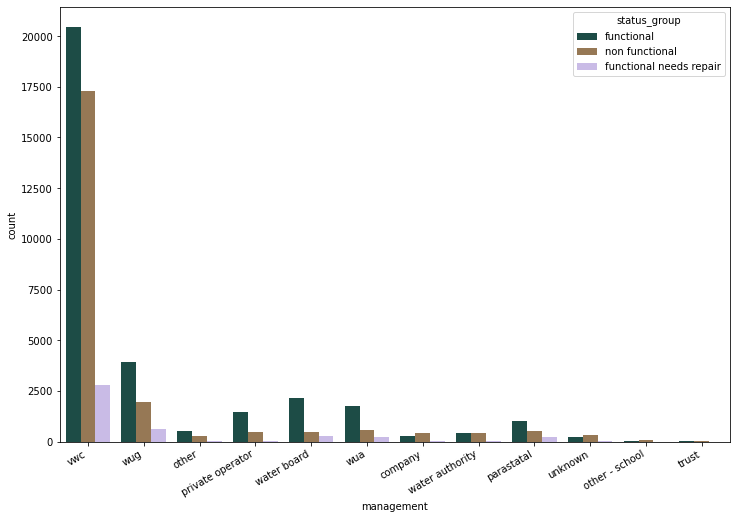

In [109]:
# Plot
plt.figure(figsize=(12,8))
ax = sns.countplot(x='management', hue='status_group', palette='cubehelix', data=merged_df)
plt.xticks(rotation=30, ha='right');

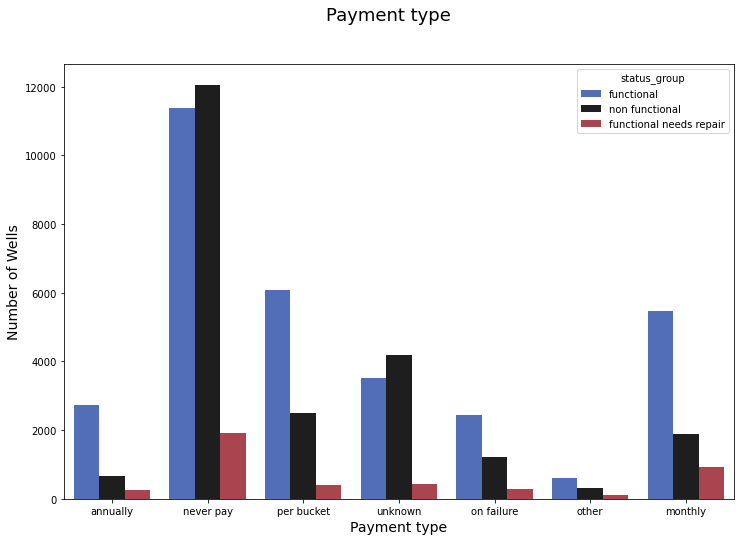

In [115]:
# Plot
fig, ax = plt.subplots(figsize=(12,8))
ax = sns.countplot(x='payment_type', hue="status_group", palette='icefire', data=merged_df)

# Title and axis labels
fig.suptitle('Payment type', fontsize=18)
plt.xlabel("Payment type", fontsize=14)
plt.ylabel("Number of Wells", fontsize=14)

# Save fig
fig.savefig('./images/payment_function.jpeg')
plt.show();

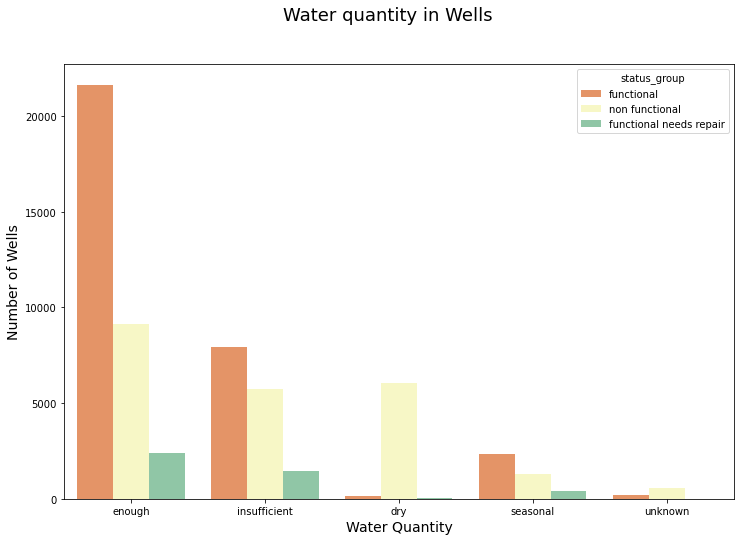

In [116]:
# Plot
fig, ax = plt.subplots(figsize=(12,8))
ax = sns.countplot(x='quantity', hue="status_group", palette='Spectral', data=merged_df)

# Axis and title
fig.suptitle('Water quantity in Wells', fontsize=18)
plt.xlabel("Water Quantity", fontsize=14)
plt.ylabel("Number of Wells", fontsize=14)

fig.savefig('./images/quantity_function.jpeg')
plt.show();




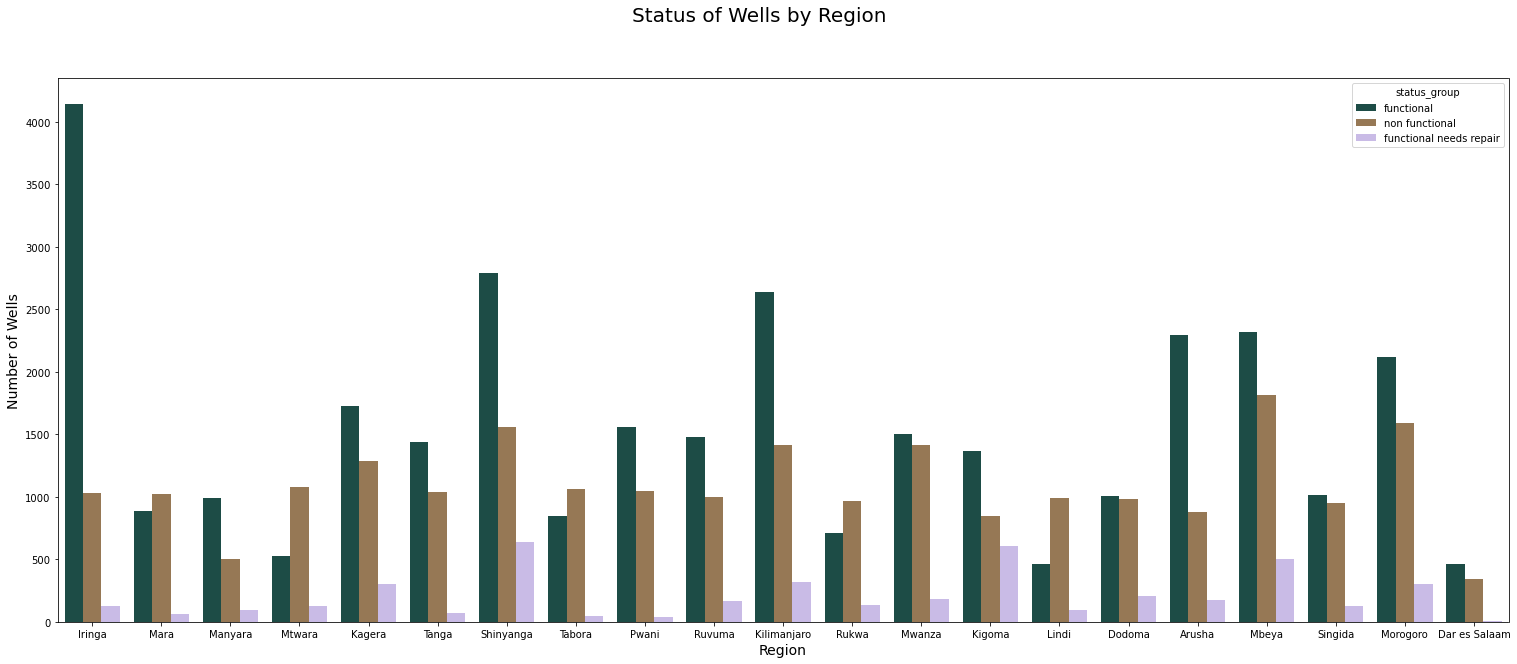

In [120]:
# Plot
fig, ax = plt.subplots(figsize=(26,10))
ax = sns.countplot(x='region', hue="status_group", palette='cubehelix', data=merged_df)

# Title and axis labels
fig.suptitle('Status of Wells by Region', fontsize=20)
plt.xlabel("Region", fontsize=14)
plt.ylabel("Number of Wells", fontsize=14)

# Save fig
fig.savefig('./images/region_function.jpeg')
plt.show();


In [154]:

# Import packages
import folium
from folium.plugins import FloatImage


# Create 3 dataframes for each status_group
df_f = merged_df[merged_df['status_group'] == 'functional']
df_nf = merged_df[merged_df['status_group'] == 'non functional']
df_fnr = merged_df[merged_df['status_group'] == 'functional needs repair']


# Create lists of latitude and longitude values
lat_f = [x for x in df_f['latitude']]
long_f = [x for x in df_f['longitude']]

lat_nf = [x for x in df_nf['latitude']]
long_nf = [x for x in df_nf['longitude']]

lat_fnr = [x for x in df_fnr['latitude']]
long_fnr = [x for x in df_fnr['longitude']]

lat_long_f = [(lat_f[i], long_f[i]) for i in range(len(lat_f))]
lat_long_nf = [(lat_nf[i], long_nf[i]) for i in range(len(lat_nf))]
lat_long_fnr = [(lat_fnr[i], long_fnr[i]) for i in range(len(lat_fnr))]

#Create map
this_map = folium.Map()

# Loop through 3 dataframes and plot point for each coordinate
for coord in lat_long_nf[::5]:
    folium.CircleMarker(location=[coord[0], coord[1]], opacity=0.6, color='red', radius=1).add_to(this_map)
for coord in lat_long_f[::5]:
    folium.CircleMarker(location=[coord[0], coord[1]], opacity=0.6, color='blue', radius=1).add_to(this_map)
for coord in lat_long_fnr[::5]:
    folium.CircleMarker(location=[coord[0], coord[1]], opacity=0.6, color='orange', radius=1).add_to(this_map) 

#Set the zoom to fit our bounds
this_map.fit_bounds(this_map.get_bounds())

# Add legend
FloatImage('./images/legend.png', bottom=30, left=75).add_to(this_map)

this_map


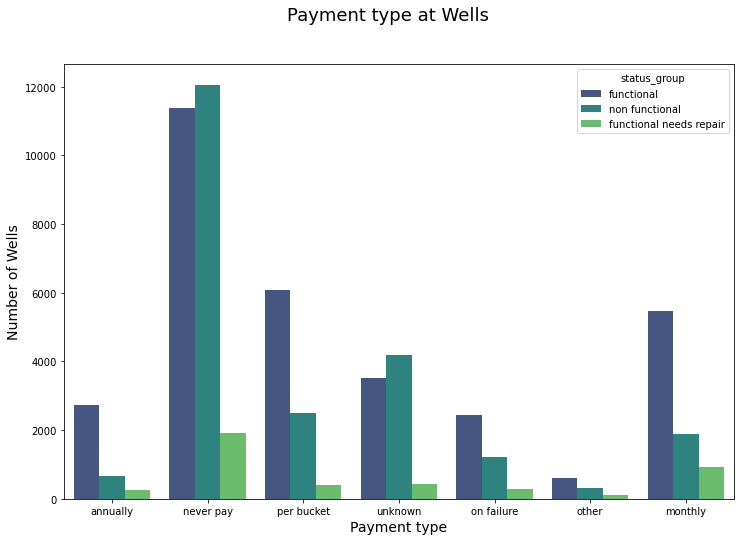

In [123]:
# Plot
fig, ax = plt.subplots(figsize=(12,8))
ax = sns.countplot(x='payment_type', hue="status_group", palette='viridis', data=merged_df)

# Title and axis labels
fig.suptitle('Payment type at Wells', fontsize=18)
plt.xlabel("Payment type", fontsize=14)
plt.ylabel("Number of Wells", fontsize=14)

# Save fig
fig.savefig('./images/payment_function.jpeg')
plt.show();

extraction_type, extraction_type_group, and extraction_type_class

payment and payment_type

water_quality and quality_group

quanitity and quantity_group

source, source_type and source_class

waterpoint_type and waterpoint_type_group

region and region_code

management and management group 

In [93]:
# Columns to be dropped
#dropped_columns = ['recorded_by', 'source', 'source_class', 'date_recorded', 'district_code', 'extraction_type', 
                   # 'extractrion_type_group', 'funder', 'id', 'installer', 'lga', 'ward', 'management_group',
                    #'num_private', 'payment', 'water_quality', 'quantity_group', 'region_code', 'scheme_name',
                    #'subvillage', 'waterpoint_type_group', 'wpt_name']


In [124]:
merged_df['source_type'].value_counts().sort_values()

other                     278
dam                       656
rainwater harvesting     2295
river/lake              10377
borehole                11949
shallow well            16824
spring                  17021
Name: source_type, dtype: int64

In [ ]:
train_values_df = train_values_df[train_values_df['source_class'] != 'unknown']